In [1]:
import tensorflow as tf
import numpy as np
#import matplotlib.pyplot as plt
from siamese.dataset import Dataset
from siamese.dataset import DataLoader
from siamese.model import *
from extensies import metrics as mt

import pandas as pd 
import ast

## Functions to help

# All trained models

In [2]:
df = pd.read_csv('records.csv',index_col=0)
df

,date,name,modality,size,model,num_of_data,iterations,augmentation,normalization,acc,acc_w,acc_p,auc,auc_w,auc_p,komentar
0,2019-03-20,t2tsetra_40x40x1_30090,['t2tsetra/t/40x40x1/'],40x40x1,siamese,323,1000,False,ScaleNormalization,0.744898,0.265306,0.673469,0.508658,0.515152,0.532468,NaN
1,2019-03-20,t2tsetra_40x40x1_24089,['t2tsetra/t/40x40x1/'],40x40x1,siamese,323,2000,False,ScaleNormalization,0.795918,0.295918,0.724490,0.575758,0.551948,0.564935,NaN
2,2019-03-20,t2tsetra_40x40x1_51626,['t2tsetra/t/40x40x1/'],40x40x1,siamese,323,3000,False,ScaleNormalization,0.806122,0.387755,0.755102,0.651515,0.593074,0.740260,NaN
3,2019-03-20,t2tsetra_40x40x1_96379,['t2tsetra/t/40x40x1/'],40x40x1,siamese,323,4000,False,ScaleNormalization,0.755102,0.397959,0.683673,0.549784,0.599567,0.642857,NaN
4,2019-03-20,adc_40x40x1_72631,['adc/t/40x40x1/'],40x40x1,siamese,324,1000,False,ScaleNormalization,0.775510,0.397959,0.704082,0.597403,0.547619,0.673160,NaN
5,2019-03-20,adc_40x40x1_18731,['adc/t/40x40x1/'],40x40x1,siamese,324,2000,False,ScaleNormalization,0.795918,0.540816,0.775510,0.662338,0.638528,0.701299,NaN
6,2019-03-20,adc_40x40x1_86012,['adc/t/40x40x1/'],40x40x1,siamese,324,3000,False,ScaleNormalization,0.704082,0.510204,0.683673,0.621212,0.584416,0.660173,NaN
7,2019-03-20,t2tsetra_adc_40x40x1_36217,"['adc/t/40x40x1/', 't2tsetra/t/40x40x1']",40x40x1,siamese,4098,1000,Elastic,ScaleNormalization,0.795918,0.285714,0.724490,0.541126,0.545455,0.616883,NaN
8,2019-03-20,t2tsetra_adc_40x40x1_47376,"['adc/t/40x40x1/', 't2tsetra/t/40x40x1']",40x40x1,siamese,4098,2000,Elastic,ScaleNormalization,0.775510,0.255102,0.714286,0.510823,0.508658,0.575758,NaN
9,2019-03-20,t2tsetra_adc_40x40x1_62224,"['adc/t/40x40x1/', 't2tsetra/t/40x40x1']",40x40x1,siamese,4098,2500,Elastic,ScaleNormalization,0.795918,0.255102,0.744898,0.523810,0.491342,0.595238,NaN


# 1. Chose the model and load data for it 

In [3]:
# index to table above
idx = 5

model_name = df.iloc[idx]['name']
modalities = df.iloc[idx]['modality']
modalities = ast.literal_eval(modalities)
combined = False
if len(modalities) > 1:
    combined = True
    
if combined:
    loader = DataLoader('../../data/',modalities)
    loader.load_data()
    X,y = loader.combine_channels(modalities)
    X_train, X_test, y_train, y_test = loader.get_train_test('combined')
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
else:
    loader = DataLoader('../../data/',modalities)
    loader.load_data()
    X,y = loader.get_data(modalities[0])
    X_train, X_test, y_train, y_test = loader.get_train_test(modalities[0])
    
dataset = Dataset()
dataset.images_train = X_train
dataset.images_test = X_test
dataset.labels_train = y_train
dataset.labels_test = y_test

# 2. Count feature vectors for train and test data

In [4]:
img_placeholder = tf.placeholder(tf.float32, [None] + list(dataset.images_train.shape[1:]), name='img')
net = mnist_model(img_placeholder, reuse=False)

#run the train image through the network to get the test features
saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    ckpt = tf.train.get_checkpoint_state("model")
    saver.restore(sess, "model/" + model_name + ".ckpt")
    train_feat = sess.run(net, feed_dict={img_placeholder:dataset.images_train})
    
#run the test image through the network to get the test features
saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    ckpt = tf.train.get_checkpoint_state("model")
    saver.restore(sess, "model/" + model_name + ".ckpt")
    search_feat = sess.run(net, feed_dict={img_placeholder:dataset.images_test})

INFO:tensorflow:Restoring parameters from model/adc_40x40x1_18731.ckpt
INFO:tensorflow:Restoring parameters from model/adc_40x40x1_18731.ckpt


# 3. Get prediction with 3 different methods 
### (most similar,    40% positive from 10 most similar,   weighted similarity with distance) 
source code in: https://github.com/FrantisekSefcik/BP_PROSTATEx/blob/master/python/extensies/metrics.py

In [5]:
y_pred,y_pred_t, y_pred_w = [],[],[]
for idx,feat in enumerate(search_feat):
    #calculate the cosine similarity and sort
    y_pred.append( mt.siamese_predict(train_feat, feat,dataset))
    y_pred_t.append( mt.treshold_predict(train_feat, feat,dataset, 0.4, 10))
    y_pred_w.append( mt.weighted_predict(train_feat, feat,dataset, 0.4, 10))

# 4. Analisis of prediction 

# T2W modality
* images of size 40x40x1, <strong> accuracy: 75.5, AUC: 74 <strong>

### 1) true positive, 2) false positiv, 3) false negative, 4) true negative 

In [7]:
predictions = mt.get_separated(dataset.labels_test,y_pred_t)

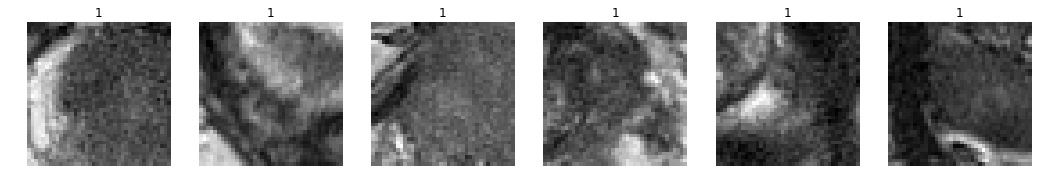

In [8]:
mt.show_image(predictions['tp'][:6],dataset.images_test,dataset.labels_test)

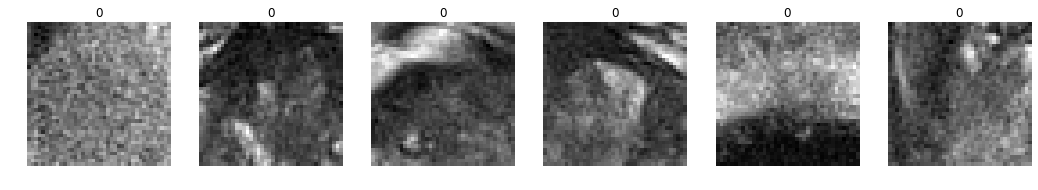

In [9]:
mt.show_image(predictions['fp'][:6],dataset.images_test,dataset.labels_test)

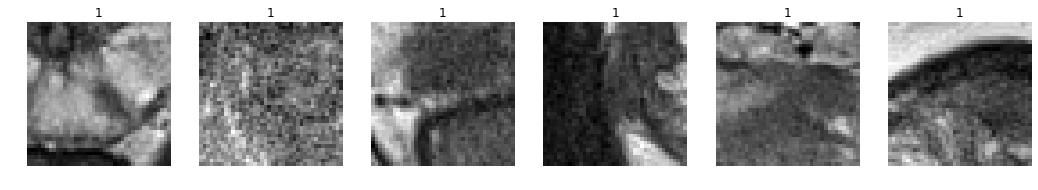

In [10]:
mt.show_image(predictions['fn'][:6],dataset.images_test,dataset.labels_test)

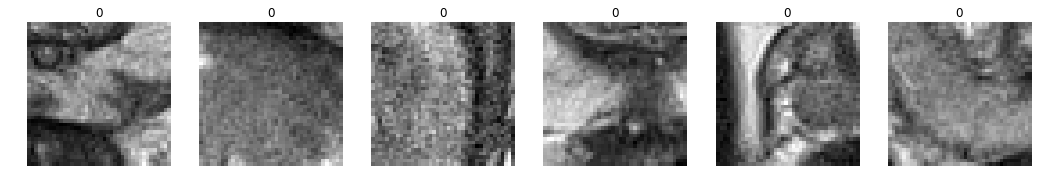

In [11]:
mt.show_image(predictions['tn'][:6],dataset.images_test,dataset.labels_test)

### most similar findings
<strong> First big image is test image and under it there are most similar images from train images <strong>

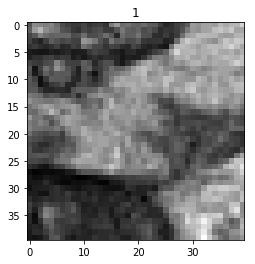

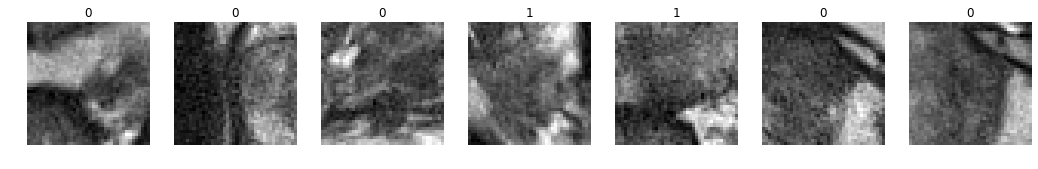

In [22]:
mt.show_most_similar(train_feat,search_feat,dataset,0,7)

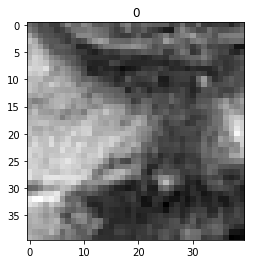

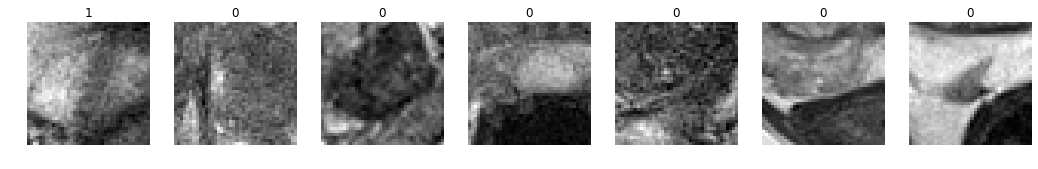

In [26]:
mt.show_most_similar(train_feat,search_feat,dataset,6,7)

test image:
most similar from train images:


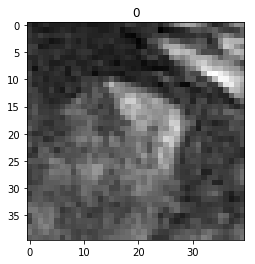

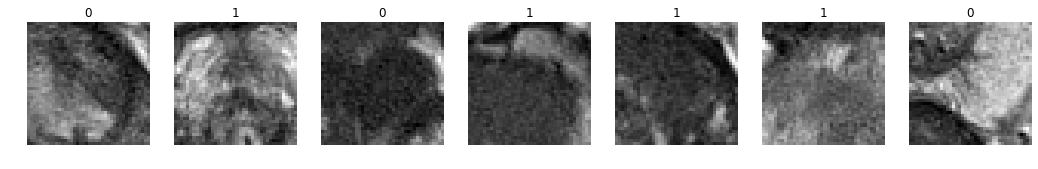

In [21]:
mt.show_most_similar(train_feat,search_feat,dataset,11,7)

# ADC modality

size 40x40x1 <strong> accuracy: 79, AUC: 70<strong>

In [6]:
predictions = mt.get_separated(dataset.labels_test,y_pred_t)

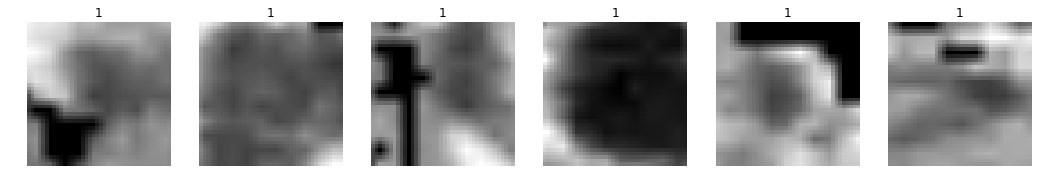

In [7]:
mt.show_image(predictions['tp'][:6],dataset.images_test,dataset.labels_test)

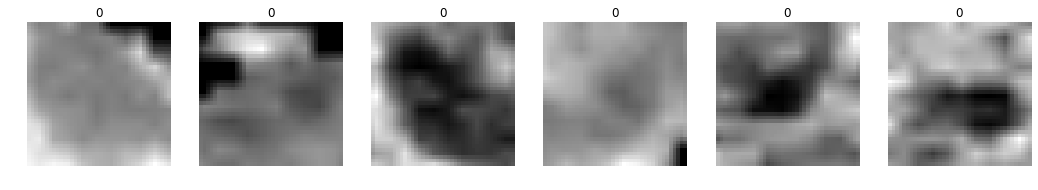

In [8]:
mt.show_image(predictions['fp'][:6],dataset.images_test,dataset.labels_test)

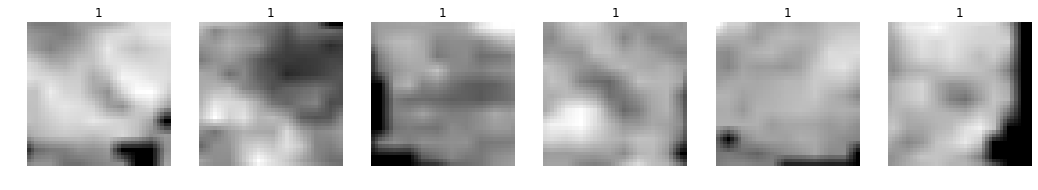

In [9]:
mt.show_image(predictions['fn'][:6],dataset.images_test,dataset.labels_test)

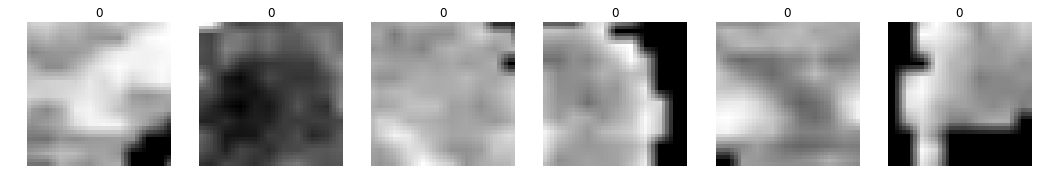

In [10]:
mt.show_image(predictions['tn'][:6],dataset.images_test,dataset.labels_test)

### most similar images

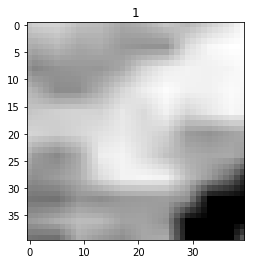

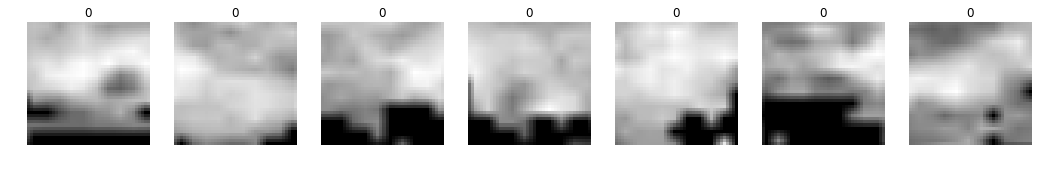

In [11]:
mt.show_most_similar(train_feat,search_feat,dataset,0,7)

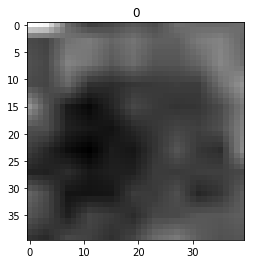

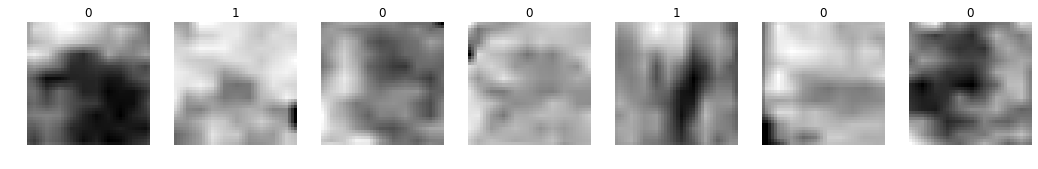

In [12]:
mt.show_most_similar(train_feat,search_feat,dataset,1,7)

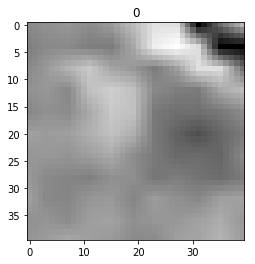

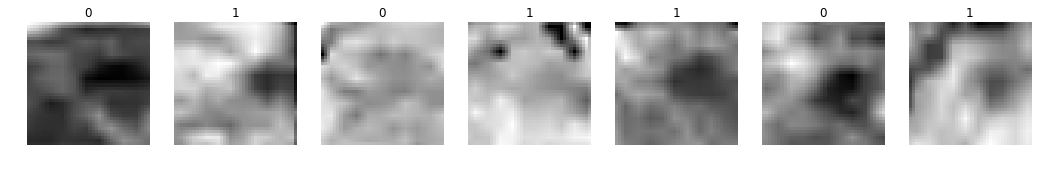

In [13]:
mt.show_most_similar(train_feat,search_feat,dataset,11,7)